In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('spek_hp.csv')
features = dataset.loc[:, ['ram', 'clock_speed', 'n_cores', 'int_memory']].values
target = dataset.iloc[:, 21].values
print(features)

[[3.476e+03 1.800e+00 3.000e+00 5.000e+00]
 [3.895e+03 5.000e-01 5.000e+00 6.100e+01]
 [2.396e+03 2.800e+00 3.000e+00 2.700e+01]
 ...
 [1.223e+03 1.400e+00 1.000e+00 8.000e+00]
 [2.509e+03 5.000e-01 2.000e+00 5.000e+01]
 [2.828e+03 5.000e-01 6.000e+00 3.500e+01]]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(features)

array([[ 1.22937276,  0.31260069, -0.58067076, -1.58126872],
       [ 1.61464307, -1.25583195,  0.2938334 ,  1.50930256],
       [ 0.23631323,  1.51908734, -0.58067076, -0.36711572],
       ...,
       [-0.84225976, -0.16999397, -1.45517492, -1.4157024 ],
       [ 0.34021668, -1.25583195, -1.01792284,  0.90222606],
       [ 0.63353704, -1.25583195,  0.73108548,  0.07439447]])

In [ ]:
decisiontree = DecisionTreeClassifier(random_state=0, max_depth=None, 
                                      min_samples_split=2, min_samples_leaf=1,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None, 
                                      min_impurity_decrease=0)

In [ ]:
model = decisiontree.fit(features,target)
test = model.predict(features)

In [ ]:
model

DecisionTreeClassifier(min_impurity_decrease=0, min_weight_fraction_leaf=0,
                       random_state=0)

In [ ]:
observation = [[4, 3, 2, 1]]
model.predict(observation)
model.predict_proba(observation)

print(observation)
print(model.predict(observation))

[[4, 3, 2, 1]]
[5]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, test)
print(cm)

[[  2   0   0   0   0]
 [  0  16   0   0   0]
 [  0   0  86   0   0]
 [  0   0   0 406   0]
 [  0   0   0   0 490]]


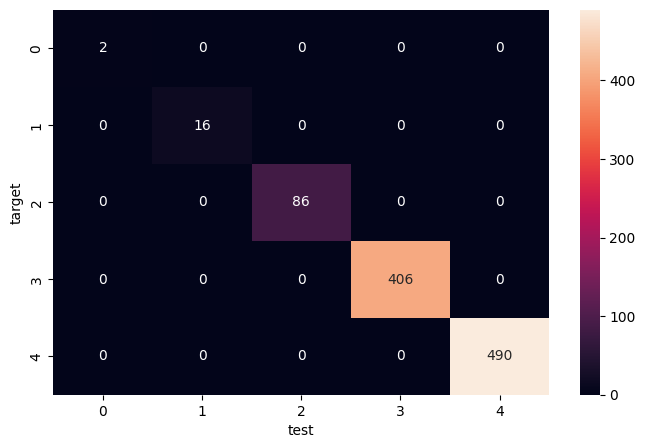

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(target, test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("test")
plt.ylabel("target")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(target, test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00       406
           5       1.00      1.00      1.00       490

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



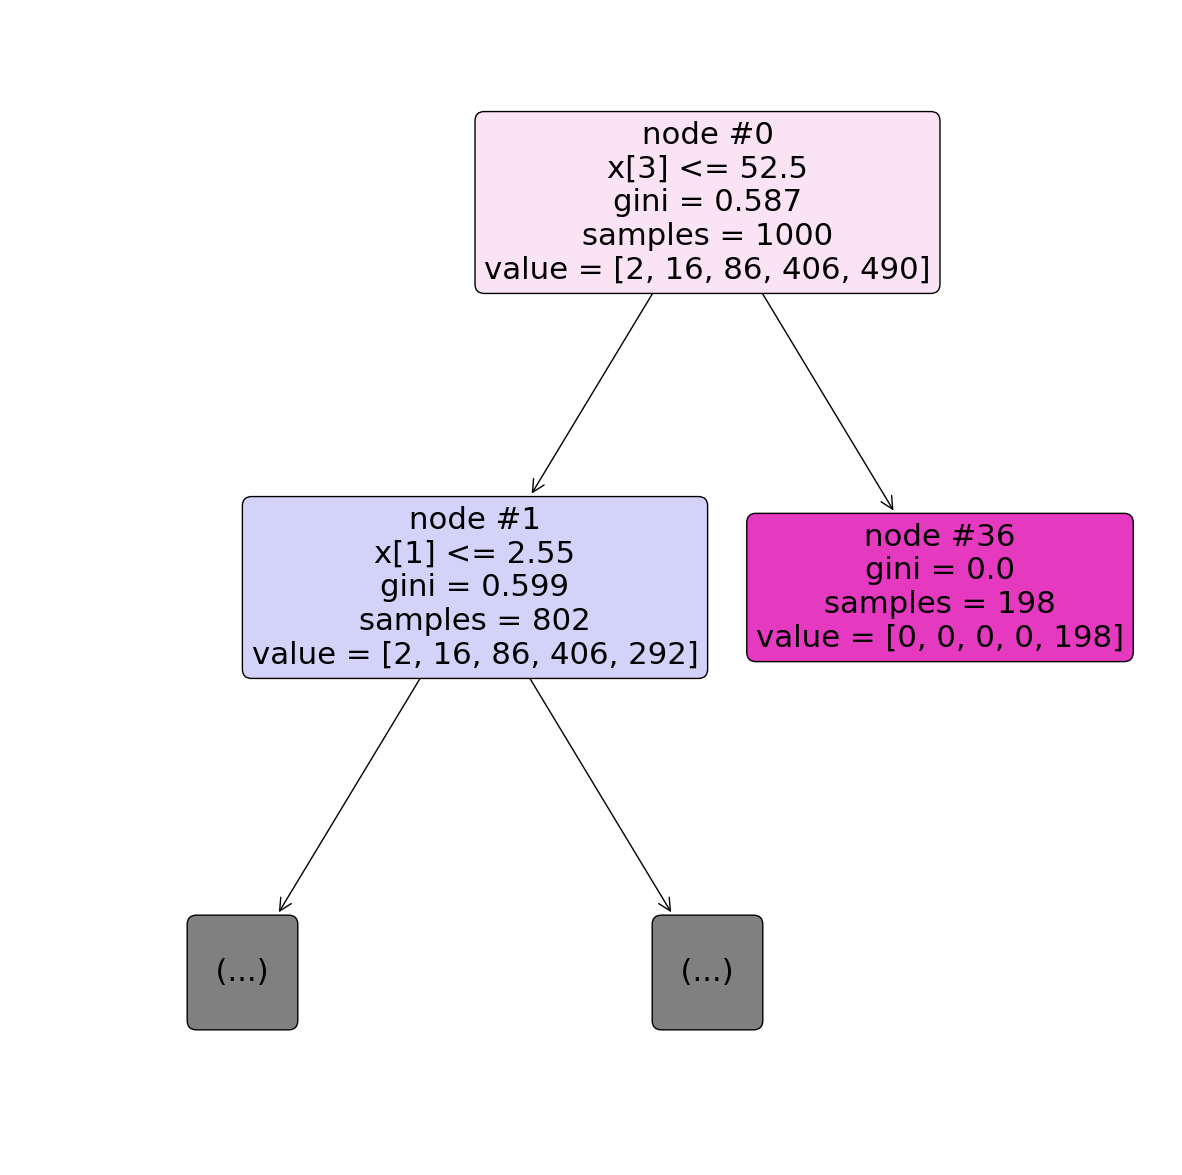

In [ ]:
#Membuat grafik visualisasi Decision Tree
import pydotplus
from sklearn import tree
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(decisiontree, max_depth = 1,
            rounded = True, 
            filled = True,  
            impurity = True,
            node_ids = True,
          )
plt.show()